## <center> RNN Forcast Exercise </center>

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Deep Learning/Data Sets/TensorFlow/Frozen_Dessert_Production.csv", index_col="DATE", parse_dates=True)
df.columns = ['Production']
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**TASK: Plot out the time series**

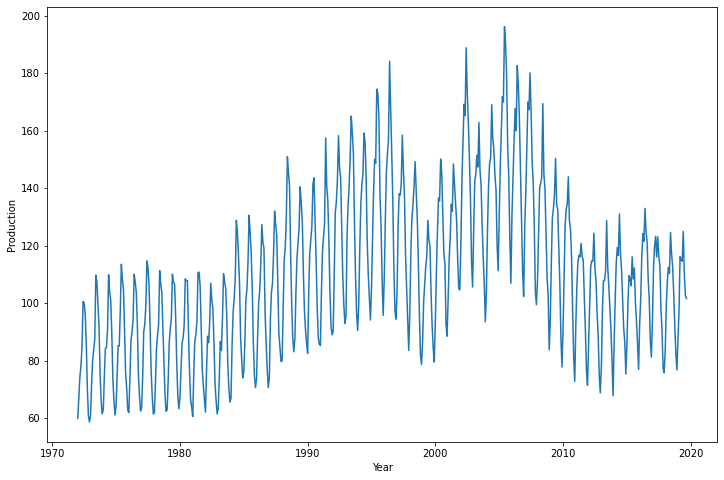

In [3]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.xlabel("Year")
plt.ylabel("Production");

**TASK: Figure out the length of the data set**

In [4]:
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [5]:
train = df[:len(df)-24]
test = train = df[len(df)-24:]

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [6]:
scaler = MinMaxScaler()

train_s = scaler.fit_transform(train)
test_s = scaler.transform(test)

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [7]:
length = 18
generator = TimeseriesGenerator(train_s, train_s,
                                length=length, batch_size=1)

validation_gen = TimeseriesGenerator(test_s, test_s, 
                                     length=length, batch_size=1)

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [8]:
model = Sequential()
model.add(LSTM(100, input_shape=(length, 1), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 18, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [11]:
model.fit_generator(generator,epochs=100,
                    validation_data=validation_gen,
                   callbacks=[early_stop])

Epoch 1/100


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8684\4291893386.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=100,


6/6 [==============================] - 8s 408ms/step - loss: 0.3024 - val_loss: 0.0493
Epoch 2/100
6/6 [==============================] - 0s 66ms/step - loss: 0.0659 - val_loss: 0.0460
Epoch 3/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0495 - val_loss: 0.0405
Epoch 4/100
6/6 [==============================] - 0s 81ms/step - loss: 0.0457 - val_loss: 0.0396
Epoch 5/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0505 - val_loss: 0.0378
Epoch 6/100
6/6 [==============================] - 0s 70ms/step - loss: 0.0434 - val_loss: 0.0405
Epoch 7/100
6/6 [==============================] - 0s 73ms/step - loss: 0.0473 - val_loss: 0.0383
Epoch 8/100
6/6 [==============================] - 0s 71ms/step - loss: 0.0440 - val_loss: 0.0407
Epoch 9/100
6/6 [==============================] - 0s 68ms/step - loss: 0.0385 - val_loss: 0.0341
Epoch 10/100
6/6 [==============================] - 0s 69ms/step - loss: 0.0340 - val_loss: 0.0361
Epoch 11/100
6/6 [============

**TASK: Plot the history of the loss that occured during training.**

<AxesSubplot:>

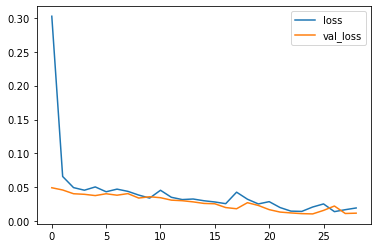

In [12]:
losses = pd.DataFrame(model.history.history)
losses.plot()

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [ ]:
# CODE HERE

,Production,Predictions
DATE,,
2017-10-01,90.4732,84.348756
2017-11-01,77.4378,75.246538
2017-12-01,75.8118,75.356393
2018-01-01,83.4343,84.964974
2018-02-01,99.4899,95.405271
2018-03-01,107.3152,103.265306
2018-04-01,112.4309,109.163361
2018-05-01,110.3544,113.237268
2018-06-01,124.5841,114.119150


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

In [ ]:
# CODE HERE

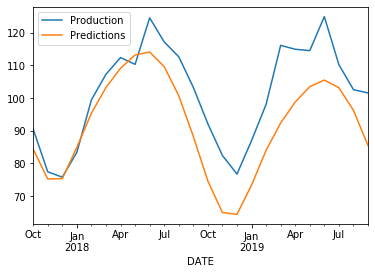

**TASK: Calculate your RMSE.**

In [ ]:
#CODE HERE